### Linear Regression

Machine Learning is the scientific process of developing an algorithm that learns the pattern from training data and performs inferences on test data. If a machine learning process is meant to predict some output value, it is called supervised learning. On the other hand, if there is no output value prediction, it is called unsupervised learning. 

Training data in **supervised learning** contains a set of features and a target. The machine learning algorithm learns from the features to map corresponding targets. Test data contains only features so that the model should predict the targets. Features and targets are also called independent variables and dependent variables, respectively. **Training data in unsupervised learning contains only features but not any target.** Rather than mapping features and targets as in supervised learning, an unsupervised learning model performs clustering (grouping) the input data based on the patterns among them.

Supervised learning is classified into two categories: 

1. Regression 
2. Classification

**Supervised learning is called regression if the dependent variable (aka target) is continuous. Supervised learning is called classification if the dependent variable is discrete.** In other words, a regression model outputs a numerical value (a real floating value), but a classification model outputs a class (among two or more classes).

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

When there is a single input variable (x), the method is referred to as **simple linear regression**. When there are multiple input variables, literature from statistics often refers to the method as **multiple linear regression**.

Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called **Ordinary Least Squares**.

**The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.**

### 1. Simple Linear Regression

With simple linear regression when we have a single input, we can use statistics to estimate the coefficients.

This requires that you calculate statistical properties from the data such as means, standard deviations, correlations and covariance. All of the data must be available to traverse and calculate statistics.

### 2. Ordinary Least Squares

When we have more than one input we can use Ordinary Least Squares to estimate the values of the coefficients.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together. This is the quantity that ordinary least squares seeks to minimize.

This approach treats the data as a matrix and uses linear algebra operations to estimate the optimal values for the coefficients. It means that all of the data must be available and you must have enough memory to fit the data and perform matrix operations.

### 3. Gradient Descent

When there are one or more inputs you can use a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data.

This operation is called Gradient Descent and works by starting with random values for each coefficient. The sum of the squared errors are calculated for each pair of input and output values. A learning rate is used as a scale factor and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.

When using this method, you must select a learning rate (alpha) parameter that determines the size of the improvement step to take on each iteration of the procedure.

### 4. Regularization

There are extensions of the training of the linear model called regularization methods. These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).

Two popular examples of regularization procedures for linear regression are:

**Lasso Regression**: where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).

**Ridge Regression**: where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization).
These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.

### The Math behind Linear Regression

Suppose a collection of data has two variables: one is the independent variable (X), and another is the dependent variable (Y). 

If the relationship between Y and X can be expressed as:

Y = mX + c, this is called linear regression. Here, X is linearly scaled with a weight m to determine the value of Y and c is called bias or y-intercept with which the dependency offsets. A machine learning model has to determine the most suitable values for weight, m and bias, c. If there are more than one independent variable, there will be a corresponding number of weights, w1, w2, w3, and so on.

Typically, a machine learning problem contains a remarkable amount of data. A linear regression model assigns random values to weights and bias at the beginning. When learning commences, the model is fed with one data point in each step. It fits the X values and determines the target. Since weights are randomly assigned initially, the predicted target will differ greatly from the actual target. **The model calculates the difference between the actual target value and the predicted target value, which is called the loss. The model scientifically reassigns the values of weights to reduce this loss. With each data point, the model iteratively attempts to find suitable weights that yield minimum loss.**

The most preferred losses are mean absolute error (MAE) and mean squared error (MSE).

### Mean Absolute Error(MAE)

Mean absolute error is the mean value of the sum of differences between predicted and actual target values for all data points.

### Mean Squared Error(MSE)

Mean squared error is the mean value of the sum of squares of differences between predicted and actual target values for all data points.

Linear regression employs mean squared error (MSE) as its loss function. When learning is finished, the loss value will be at its minimum. In other words, the predicted value will be as close as possible to the actual target value.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

In [3]:
data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [10]:
#Generate features and target. Visualize the top 5 rows of the data.
features=pd.DataFrame(data['data'], columns=data['feature_names'])
target=pd.Series(data['target'], name='target')
features

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [11]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

### Simple Linear Regression

Simple linear regression is performed with one dependent variable and one independent variable. In our data, we declare the feature ‘bmi’ to be the independent variable.

In [33]:
# Prepare X and y.
X = features['bmi'].values.reshape(-1,1)
y = target.values.reshape(-1,1) 

In [34]:
# Perform linear regression.
simple = LinearRegression()
simple.fit(X,y)
# The training is completed. We can explore the weight (coefficient) and bias (intercept) of the trained model.

LinearRegression()

In [35]:
simple.coef_

array([[949.43526038]])

In [36]:
simple.intercept_

array([152.13348416])

In [37]:
# Calculate the predictions following the formula, y = intercept + X*coefficient.
calc_pred = simple.intercept_ + (X*simple.coef_)
calc_pred

array([[210.71003806],
       [103.26219543],
       [194.33703347],
       [141.12476855],
       [117.58857445],
       [113.4953233 ],
       [107.35544658],
       [150.33458363],
       [210.71003806],
       [189.22046954],
       [ 72.56281182],
       [168.7542138 ],
       [124.75176395],
       [150.33458363],
       [127.82170232],
       [134.98489182],
       [192.2904079 ],
       [163.63764986],
       [142.14808133],
       [134.98489182],
       [ 98.14563149],
       [130.89164068],
       [148.28795806],
       [209.68672528],
       [186.15053118],
       [140.10145576],
       [ 78.70268854],
       [208.66341249],
       [131.91495346],
       [146.24133248],
       [194.33703347],
       [ 89.9591292 ],
       [271.0854925 ],
       [104.28550821],
       [ 92.00575477],
       [122.70513838],
       [173.87077773],
       [162.61433707],
       [219.91985315],
       [165.68427544],
       [144.19470691],
       [ 87.91250362],
       [142.14808133],
       [129

In [38]:
# Predictions can also be calculated using the trained model.
pred = simple.predict(X)
pred

array([[210.71003806],
       [103.26219543],
       [194.33703347],
       [141.12476855],
       [117.58857445],
       [113.4953233 ],
       [107.35544658],
       [150.33458363],
       [210.71003806],
       [189.22046954],
       [ 72.56281182],
       [168.7542138 ],
       [124.75176395],
       [150.33458363],
       [127.82170232],
       [134.98489182],
       [192.2904079 ],
       [163.63764986],
       [142.14808133],
       [134.98489182],
       [ 98.14563149],
       [130.89164068],
       [148.28795806],
       [209.68672528],
       [186.15053118],
       [140.10145576],
       [ 78.70268854],
       [208.66341249],
       [131.91495346],
       [146.24133248],
       [194.33703347],
       [ 89.9591292 ],
       [271.0854925 ],
       [104.28550821],
       [ 92.00575477],
       [122.70513838],
       [173.87077773],
       [162.61433707],
       [219.91985315],
       [165.68427544],
       [144.19470691],
       [ 87.91250362],
       [142.14808133],
       [129

In [39]:
#We can check whether the calculated predictions and model’s predictions are identical.
(calc_pred == pred).all()

True

Plot the actual values and predicted values to get a better understanding.

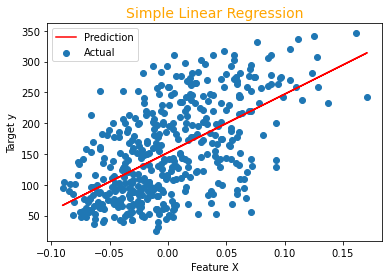

In [43]:
# plot actual values
plt.scatter(X,y, label='Actual')
# plot predicted values
plt.plot(X,pred, '-r', label='Prediction')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Simple Linear Regression', color='orange', size=14)
plt.legend()
plt.show()

According to SciKit-Learn’s LinearRegression method, the above red line is the best possible fit with minimal error value. 

In [46]:
# We can calculate the mean squared error value for the above regression using the following code.

from sklearn.metrics import mean_squared_error
mean_squared_error(y, pred)

3890.4565854612724

This error value seems too high because of the nature of the actual data. It can be observed from the above plot that the target has multiple values corresponding to a single feature value. The data is highly scattered, which can not be fit completely with a straight line. However, we may wish to conclude how good the fit is. The error just yields an incomparable number.

### Coefficient of Determination (CoD) or R-Squared

A parameter named Coefficient of Determination (CoD) is helpful in this case. **CoD gives the ratio of the regression sum of square to the total sum of the square. Total sum of squares (SST) is the sum of deviations of each y value from the mean value of y. Regression sum of squares (SSR) is the difference between the total sum of squares and the sum of squared error (SSE).** When there is no error (MSE = 0), CoD becomes unity. When the sum of squared error equals the total sum of squares (SSE = SST), CoD becomes zero.

CoD = 1 refers to the best prediction

CoD = 0 refers to the worst prediction

CoD gives a limit [0,1], thus makes the predictions comparable. CoD is also called R-squared value.

In [49]:
# R-Squared can be calculated using the following code.
simple.score(X,y)

0.3439237602253803

With high scatteredness in data, 0.34 is the best possible fit by linear regression.

### Multiple Linear Regression

In [50]:
# Multiple linear regression is performed with more than one independent variable.
# We choose the following columns as our features.
columns = ['age', 'bmi', 'bp', 's3', 's5']

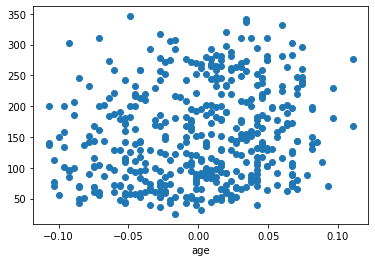

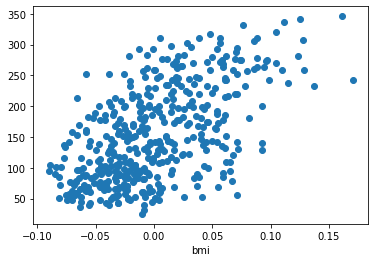

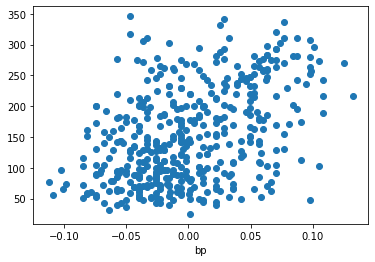

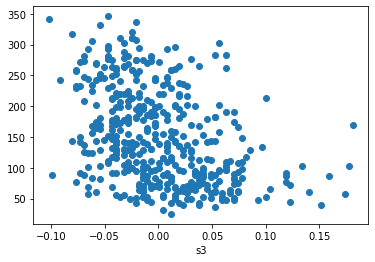

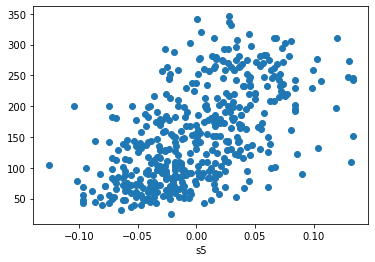

In [51]:
for i in columns:
    plt.scatter(features[i], y)
    plt.xlabel(str(i))
    plt.show()

It is observed that each individual feature has scatteredness in nature. But, the variation in target values for a single input feature value may be explained by some other features. In other words, the target value may find difficulty in fitting a linear regression model with a single feature. Nevertheless, it may yield an improved fit with multiple features by exploring the true pattern in the data.

In [53]:
# Let’s split the dataset into training and validation sets.
from sklearn.model_selection import train_test_split
X = features[columns]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=6)

In [55]:
# Build a linear regression model and fit the data.
multi= LinearRegression()
multi.fit(X_train,y_train)

LinearRegression()

In [58]:
# Weights (coefficients) of the model. There should be five coefficients each corresponding to each feature.
multi.coef_

array([[ -79.7520873 ,  595.40113097,  311.49720444, -159.42906869,
         496.82564004]])

In [59]:
# intercept (bias) of the model
multi.intercept_

array([150.16282646])

In [61]:
# Let’s predict the target values corresponding to the features in the validation data.
pred = multi.predict(X_test)
pred

array([[ 70.87352072],
       [254.95869703],
       [ 57.31440926],
       [123.44276227],
       [ 55.13904301],
       [138.02836792],
       [226.14929876],
       [216.4509575 ],
       [147.7028426 ],
       [194.47025816],
       [ 73.13151213],
       [ 43.151623  ],
       [141.77928211],
       [ 92.43405582],
       [202.72095042],
       [144.25826619],
       [ 70.85978761],
       [205.09689669],
       [132.05340968],
       [ 58.8756199 ],
       [ 70.54578007],
       [110.81991502],
       [208.72367035],
       [130.06025471],
       [106.40853627],
       [271.71912294],
       [203.85026266],
       [247.41565373],
       [159.36045069],
       [ 96.4130151 ],
       [217.90083187],
       [102.85812593],
       [115.6315311 ],
       [ 81.43586486],
       [ 96.34553949],
       [170.66635078],
       [217.97021709],
       [270.59426255],
       [133.07431281],
       [ 98.8842869 ],
       [200.14543403],
       [158.98269025],
       [171.82629293],
       [256

In [62]:
# We can evaluate the model by calculating the error or R-squared value.
mean_squared_error(y_test, pred)

2920.3174710162457

In [64]:
# Calculate the R-squared value for both training set and validation set.
multi.score(X_train, y_train), multi.score(X_test, y_test)

(0.4930701536423693, 0.46527175799338716)

### Using statsmodels Library

Fit the training data on the OLS (Ordinary Least Squares) model available in the statsmodels library.

In [65]:
import statsmodels.api as sm
# add constant (intercept) manually
X_train = sm.add_constant(X_train)
# fit training data
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     67.50
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           3.91e-49
Time:                        18:03:41   Log-Likelihood:                -1917.0
No. Observations:                 353   AIC:                             3846.
Df Residuals:                     347   BIC:                             3869.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.1628      2.967     50.610      0.000     144.327     155.999
age          -79.7521     67.192     -1.187      0.236    -211.907      52.403
bmi          595.4011     76.489      7.784      0.000     444.960     745.842
bp           311.4972     72.873      4.274      0.000     168.168     454.826
s3          -159.4291     71.616     -2.226      0.027    -300.284     -18.574
s5           496.8256     77.142      6.440      0.000     345.102     648.549
==============================================================================
Omnibus:                        8.844   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.630
Skew:                           0.225   Prob(JB):                       0.0363
Kurtosis:                       2.502   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be observed that the model weights, intercept and the R-squared value are all identical to the Linear Regression method of the SciKit-Learn library.

In [68]:
# The model can be implemented to make predictions on validation data too.
# Constant (intercept) must be added manually
X_test = sm.add_constant(X_test)
preds = model.predict(X_test)
mean_squared_error(y_test, preds) 

2920.317471016256